In [1]:
import tensorflow as tf; print(tf.__version__)

1.10.1


In [2]:
#Read in file names and paths from the input directory
from os import walk
import os

filePath = 'input'
f = {}
for (dirpath, dirnames, filenames) in walk(filePath):
    if filenames:
        f[dirpath.rsplit('/', 1)[-1]] = list(os.path.join(dirpath, x) for x in filenames)
    
f

{'dry': ['input/dry/1128491081.CSV',
  'input/dry/1993312851.CSV',
  'input/dry/1851359291.CSV',
  'input/dry/2015029203.CSV',
  'input/dry/673798596.CSV',
  'input/dry/1387191509.CSV',
  'input/dry/157118630.CSV',
  'input/dry/1367731996.CSV',
  'input/dry/1088131773.CSV',
  'input/dry/526590785.CSV',
  'input/dry/1240596962.CSV',
  'input/dry/1948652171.CSV',
  'input/dry/891085006.CSV',
  'input/dry/957252430.CSV',
  'input/dry/323836156.CSV',
  'input/dry/1135972257.CSV',
  'input/dry/870156681.CSV',
  'input/dry/459361833.CSV',
  'input/dry/2054490787.CSV',
  'input/dry/532873244.CSV',
  'input/dry/352572264.CSV',
  'input/dry/1910189788.CSV',
  'input/dry/2059645055.CSV',
  'input/dry/419776737.CSV',
  'input/dry/875121173.CSV',
  'input/dry/530759577.CSV',
  'input/dry/438882418.CSV',
  'input/dry/1344943899.CSV',
  'input/dry/529404666.CSV',
  'input/dry/511827363.CSV',
  'input/dry/1465550401.CSV',
  'input/dry/1388703417.CSV',
  'input/dry/679156288.CSV',
  'input/dry/1781638

In [3]:
#Read in CSV files
import pandas as pd
import numpy as np

data = []
labels = []
label_names = []

index = 0
for key in f:
    for fileName in f[key]:
        #read csv
        df = pd.read_csv(fileName, header=None, usecols=lambda x: x < 64)
        #add to data
        data.append(df.values[0])
        #Add flipped data
        flip_0 = np.flip(df.values[0].reshape((8,8)), 0)
        flip_0_1 = np.flip(flip_0, 1)
        data.append(flip_0.reshape(64))
        data.append(flip_0_1.reshape(64))
        flip_1 = np.flip(df.values[0].reshape((8,8)), 1)
        data.append(flip_1.reshape(64))
        #create noisy data
        noise_level = 0.2
        noise = np.random.normal(-noise_level, noise_level, df.values[0].shape)
        data.append(df.values[0] + noise);
        noise = np.random.normal(-noise_level, noise_level, df.values[0].shape)
        data.append(flip_0_1.reshape(64) + noise)
        noise = np.random.normal(-noise_level, noise_level, df.values[0].shape)
        data.append(flip_0.reshape(64))
        noise = np.random.normal(-noise_level, noise_level, df.values[0].shape)
        data.append(flip_1.reshape(64))
        noise_level = 0.5
        noise = np.random.normal(-noise_level, noise_level, df.values[0].shape)
        data.append(df.values[0] + noise);
        noise = np.random.normal(-noise_level, noise_level, df.values[0].shape)
        data.append(flip_0_1.reshape(64) + noise)
        noise = np.random.normal(-noise_level, noise_level, df.values[0].shape)
        data.append(flip_0.reshape(64))
        noise = np.random.normal(-noise_level, noise_level, df.values[0].shape)
        data.append(flip_1.reshape(64))
        #add labels - for original and flipped
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
    #add label name    
    label_names.append(key)
    #count numver of classes
    index += 1



In [4]:
np.random.normal(-0.2, 0.2, df.values[0].shape)


array([-0.3388885 , -0.3336945 , -0.17016801, -0.43025963, -0.12269619,
        0.04903152, -0.24890424, -0.58874564,  0.43381658, -0.23461382,
       -0.40282624,  0.05407118, -0.16832824, -0.16861756,  0.1681601 ,
       -0.64010504, -0.5272415 , -0.15904267, -0.27188085, -0.12506383,
       -0.13936872, -0.33956035, -0.26684066,  0.1056651 , -0.56557746,
       -0.2680143 , -0.42097211, -0.16816163, -0.26582135, -0.25621798,
        0.01660815,  0.05529268, -0.08242721, -0.31202253, -0.3929743 ,
       -0.3549292 , -0.40495596, -0.21159032,  0.2291762 , -0.55792645,
        0.04662906, -0.08704142, -0.27162235, -0.1291806 ,  0.12583406,
        0.13458984,  0.18735366, -0.19146022,  0.04683353, -0.07419724,
       -0.30827296, -0.12498829, -0.59149734,  0.18686072, -0.36139451,
       -0.16139185, -0.00124672, -0.1792879 , -0.00452042,  0.10960949,
       -0.20689598, -0.25590696, -0.37885833, -0.07568227])

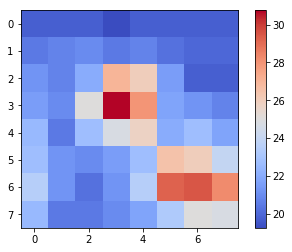

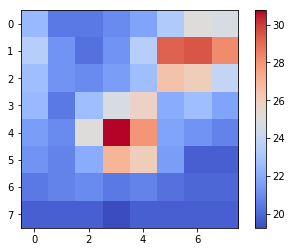

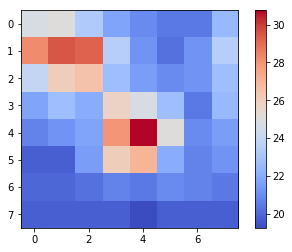

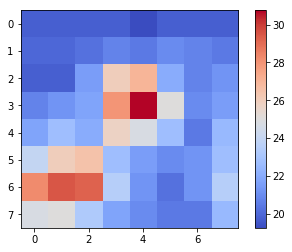

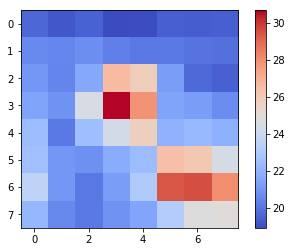

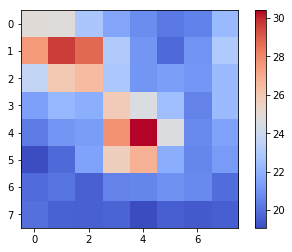

In [5]:
#Print test images
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(6):
    plt.imshow(data[i].reshape((8,8)), cmap='coolwarm')
    plt.colorbar()
    plt.show()

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,20.75,20.5,20.75,20.75,20.75,20.5,21.0,20.75,20.5,21.5,...,21.25,21.0,20.75,21.25,21.0,21.0,21.25,20.75,21.25,20.5


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler_model = MinMaxScaler()
scaler_model.fit(data)
data = scaler_model.transform(data)

In [8]:
from sklearn.externals import joblib
scaler_filename = "scaler.save"
joblib.dump(scaler_model, scaler_filename) 

['scaler.save']

In [9]:
print(data.shape)
data

(10824, 64)


array([[0.58392128, 0.62532318, 0.61778002, ..., 0.81749891, 0.95724245,
        0.85598761],
       [0.73648348, 0.67419407, 0.66069113, ..., 0.60458097, 0.61847577,
        0.56796282],
       [0.86130709, 0.96741941, 0.81803186, ..., 0.60458097, 0.61847577,
        0.56796282],
       ...,
       [0.53919086, 0.66780326, 0.69316472, ..., 0.59925441, 0.62024264,
        0.58595159],
       [0.63939844, 0.72306496, 0.68929853, ..., 0.65020625, 0.6991345 ,
        0.62556778],
       [0.63939844, 0.70677466, 0.66069113, ..., 0.68062309, 0.71526625,
        0.62556778]])

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42)

X_train = np.array(X_train);
y_train = np.array(y_train);
X_test = np.array(X_test);
y_test = np.array(y_test);



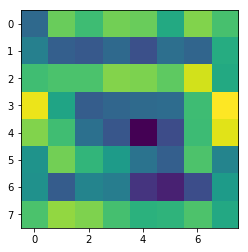

In [11]:
img = X_train[0].reshape((8,8))
img = np.flip(img, 0)
plt.imshow(img)

In [12]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout

num_classes = index
resnet_weights_path = filePath + '/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

model = Sequential()
model.add(Dropout(0.025));
# model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.025));
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.025));
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.05));
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.05));
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2));
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2));
model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
# model.layers[0].trainable = False

In [13]:
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
sgd = optimizers.SGD(lr=0.1, clipnorm=1.)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:

#data
model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        #validation_steps=1,
        steps_per_epoch=5000,
        epochs=5,
        callbacks=[tensorboard])


Epoch 1/5
4138/5000 [=======================>......] - ETA: 23s - loss: 0.4037 - acc: 0.7973

In [ ]:
print(model.metrics_names)
print(model.evaluate(X_test, y_test))
print(model.evaluate(X_train, y_train))


In [ ]:
import matplotlib.pyplot as plt


for i in range (0,11):
    image = X_test[i]
    pred = model.predict(X_test[i:i+1])
    
    plt.imshow(image.reshape((8,8)), cmap='coolwarm')
    plt.colorbar()
    plt.show()
    print("Should be: " + label_names[y_test[i]])
    print(label_names)
    print(pred)
    print("Prediction: " + label_names[pred.argmax()]) 


In [ ]:
type(X_test[0:0+1])
X_test[0:0+1].shape
type(X_test[0:0+1][0])

In [ ]:
#Save the model
model.save("test_model.h5");